In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("../data/dataset.csv")

In [6]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [16]:
# remove the extra index column
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

In [17]:
df.shape

(114000, 20)

In [19]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [18]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [21]:
df[df.artists.isna()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [22]:
df = df.dropna()

#### Explore target feature (Popularity)

<Axes: >

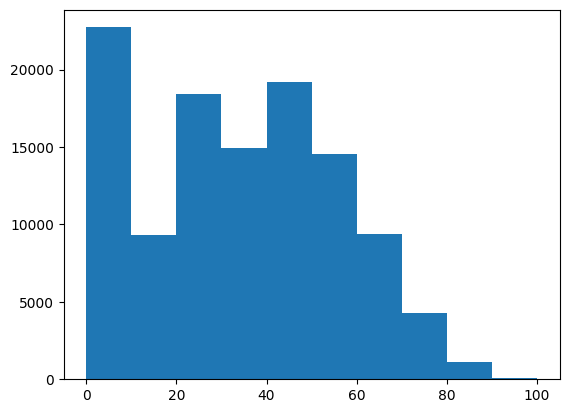

In [20]:
df.popularity.hist(grid=False)

In [13]:
df.popularity.describe()

count    114000.000000
mean         33.238535
std          22.305078
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

#### Explore Features

In [25]:
df.artists.nunique()

31437

In [30]:
# top10 artists in dataset
df.artists.value_counts(dropna=False).head(10)

artists
The Beatles        279
George Jones       271
Stevie Wonder      236
Linkin Park        224
Ella Fitzgerald    222
Prateek Kuhad      217
Feid               202
Chuck Berry        190
Håkan Hellström    183
OneRepublic        181
Name: count, dtype: int64

In [38]:
df.track_genre.nunique()

114

In [37]:
# top10 track genres in dataset
df.track_genre.value_counts(dropna=False)

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
turkish        1000
trip-hop       1000
world-music    1000
k-pop           999
Name: count, Length: 114, dtype: int64

In [40]:
df.album_name.nunique()

46589

In [41]:
df.album_name.value_counts(dropna=False).head(10)

album_name
Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    184
Metal                          143
Halloween con perreito         123
Halloween Party 2022           115
The Complete Hank Williams     111
Fiesta portatil                110
Frescura y Perreo              106
Esto me suena a Farra          105
Perreo en Halloween            103
Name: count, dtype: int64

In [45]:
df.track_name.nunique()

73608

In [46]:
df.track_name.value_counts(dropna=False).head(10)

track_name
Run Rudolph Run                   151
Halloween                          88
Frosty The Snowman                 81
Little Saint Nick - 1991 Remix     76
Last Last                          75
Christmas Time                     72
CÓMO SE SIENTE - Remix             64
Sleigh Ride                        61
RUMBATÓN                           60
X ÚLTIMA VEZ                       58
Name: count, dtype: int64

In [58]:
df.query("track_name == 'Run Rudolph Run'").artists.value_counts()

artists
Chuck Berry    151
Name: count, dtype: int64

In [60]:
df.query("track_name == 'Run Rudolph Run'").album_name.nunique()

40